## *Importing* Libraries 

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score ,classification_report,confusion_matrix
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


## Importing Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = "/content/drive/MyDrive/Dataset/Dataset.csv"
data = pd.read_csv(path)

## Exploratory Data Analysis

In [6]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   int64  
 1   Age (in years)         5000 non-null   int64  
 2   Experience (in years)  5000 non-null   int64  
 3   Income (in K/month)    5000 non-null   int64  
 4   ZIP Code               5000 non-null   int64  
 5   Family members         4982 non-null   float64
 6   CCAvg                  5000 non-null   float64
 7   Education              5000 non-null   int64  
 8   Mortgage               5000 non-null   int64  
 9   Personal Loan          5000 non-null   int64  
 10  Securities Account     5000 non-null   int64  
 11  CD Account             5000 non-null   int64  
 12  Online                 5000 non-null   int64  
 13  CreditCard             5000 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 547.0 KB


In [7]:
data.describe()

,ID,Age (in years),Experience (in years),Income (in K/month),ZIP Code,Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4982.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.39723,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.14716,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.00000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.00000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.00000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.00000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Null Value Detection

In [8]:
data.isnull().sum()

ID                        0
Age (in years)            0
Experience (in years)     0
Income (in K/month)       0
ZIP Code                  0
Family members           18
CCAvg                     0
Education                 0
Mortgage                  0
Personal Loan             0
Securities Account        0
CD Account                0
Online                    0
CreditCard                0
dtype: int64

In [9]:
data['Family members'].fillna(data['Family members'].mode()[0],inplace=True)

In [10]:
data.isnull().sum()

ID                       0
Age (in years)           0
Experience (in years)    0
Income (in K/month)      0
ZIP Code                 0
Family members           0
CCAvg                    0
Education                0
Mortgage                 0
Personal Loan            0
Securities Account       0
CD Account               0
Online                   0
CreditCard               0
dtype: int64

In [11]:
data[data.duplicated()]

,ID,Age (in years),Experience (in years),Income (in K/month),ZIP Code,Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [12]:
data = data.rename(columns={'Age (in years)':'Age','Experience (in years)':'Experience','Income (in K/month)':'Income','ZIP Code':'ZIP_Code','Family members':'Family_members','Personal Loan':'Personal_Loan','Securities Account':'Securities_Account','CD Account':'CD_Account'})

In [13]:
data.head()

,ID,Age,Experience,Income,ZIP_Code,Family_members,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4.0,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3.0,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1.0,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1.0,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4.0,1.0,2,0,0,0,0,0,1


## Data Visualisation

### Univariate Analysis

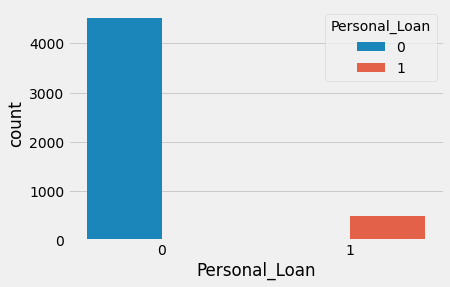

In [14]:
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='Personal_Loan', data=data,hue='Personal_Loan')

In [15]:
data['Personal_Loan'].value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

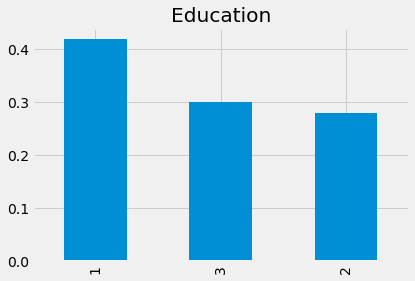

In [23]:
data['Education'].value_counts(normalize=True).plot(kind='bar',title= 'Education')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


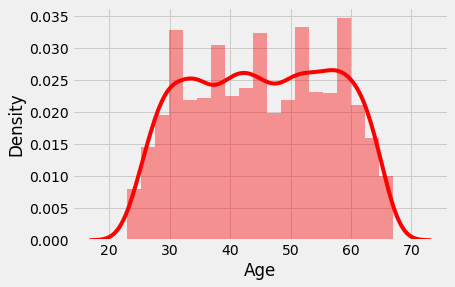

In [18]:
sns.distplot(data['Age'],color='red')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


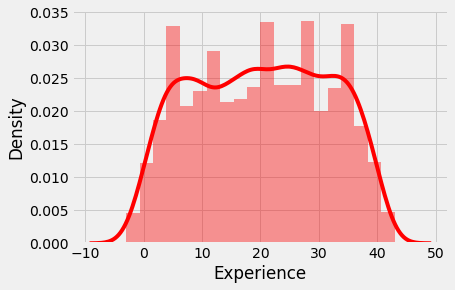

In [19]:
sns.distplot(data['Experience'],color='red')

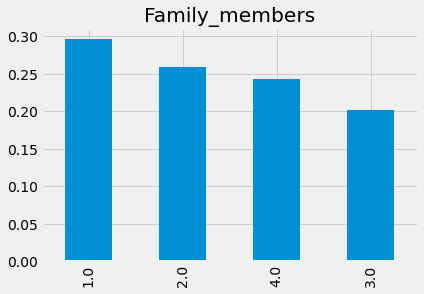

In [22]:
data['Family_members'].value_counts(normalize=True).plot(kind='bar',title= 'Family_members')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

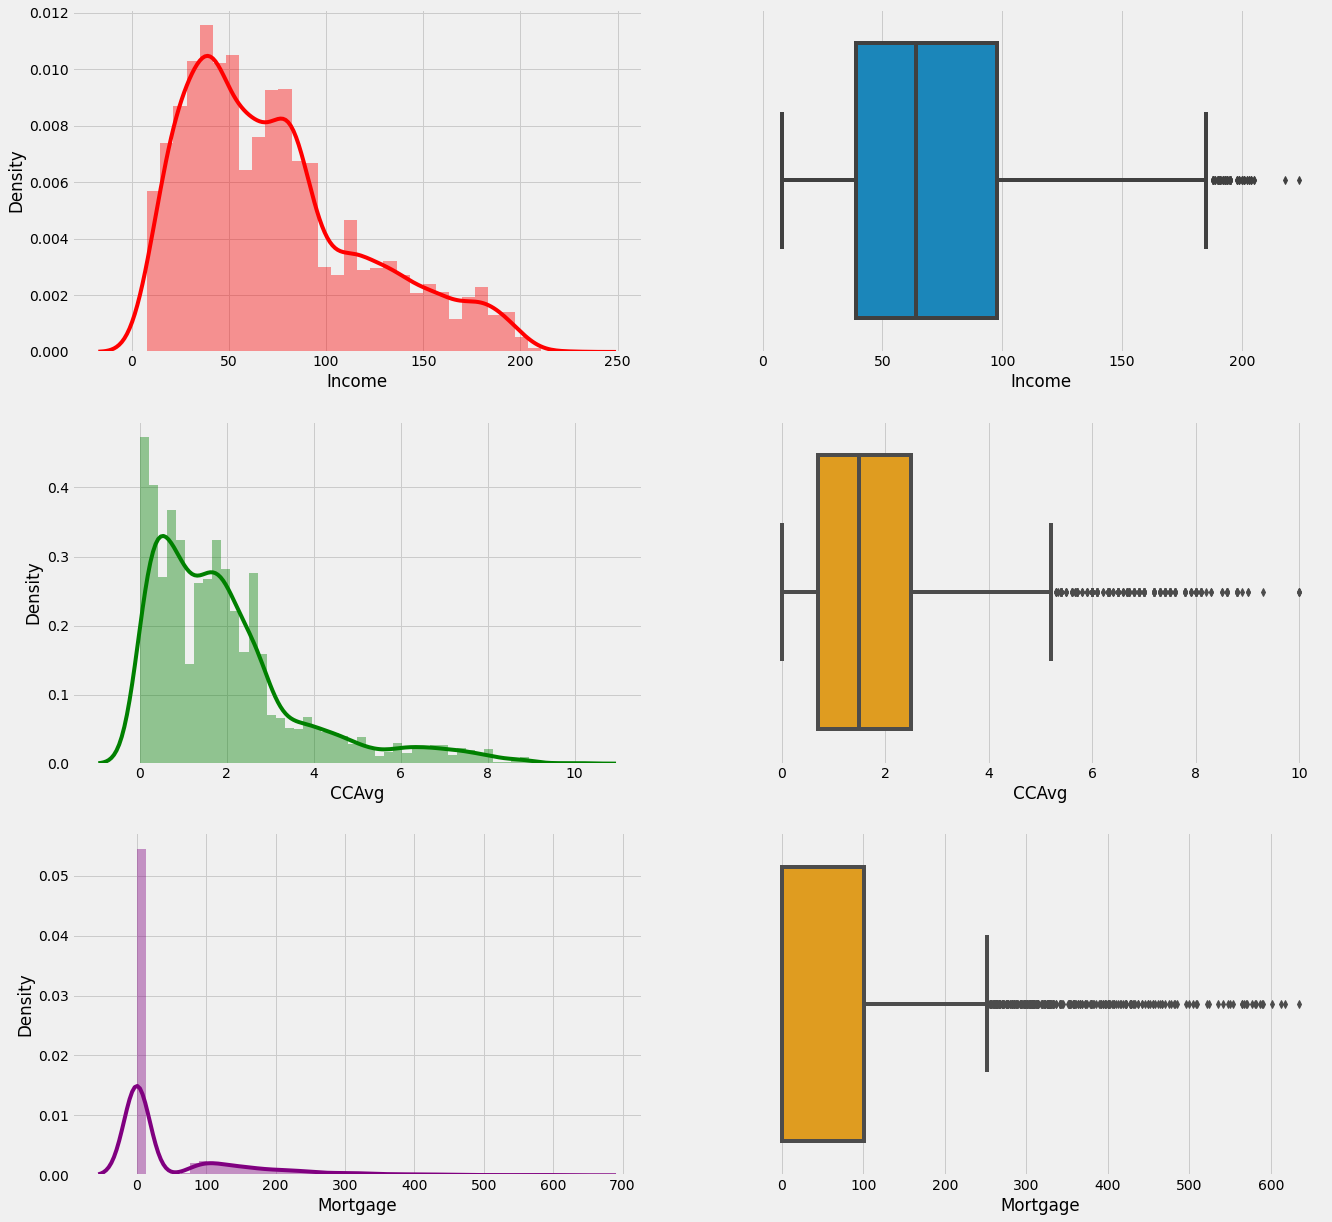

In [28]:
fig, axes = plt.subplots(3,2, figsize=(20, 20))
sns.distplot(data['Income'],ax=axes[0,0],color='red')
sns.boxplot(data['Income'],data=data,ax=axes[0,1])
sns.distplot(data['CCAvg'],ax=axes[1,0],color='green')
sns.boxplot(data['CCAvg'],ax=axes[1,1],color='orange')
sns.distplot(data['Mortgage'],ax=axes[2,0],color='purple')
sns.boxplot(data['Mortgage'],ax=axes[2,1],color='orange')


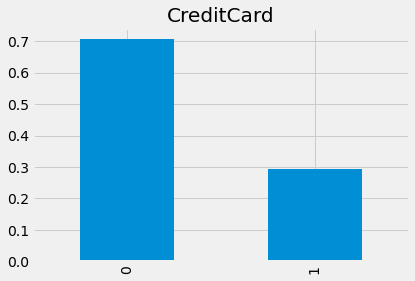

In [42]:
data['CreditCard'].value_counts(normalize=True).plot(kind='bar',title= 'CreditCard')

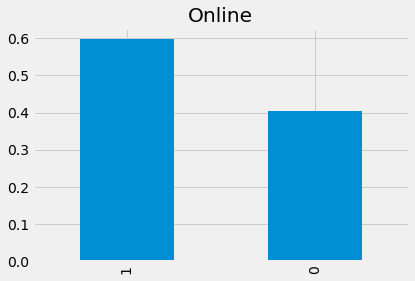

In [43]:
data['Online'].value_counts(normalize=True).plot(kind='bar',title= 'Online')

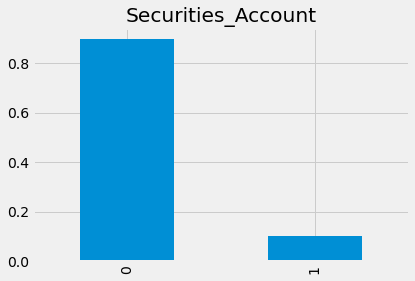

In [44]:
data['Securities_Account'].value_counts(normalize=True).plot(kind='bar',title= 'Securities_Account')


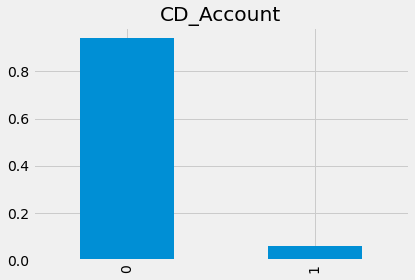

In [45]:
data['CD_Account'].value_counts(normalize=True).plot(kind='bar',title= 'CD_Account')

### BiVariate Analysis

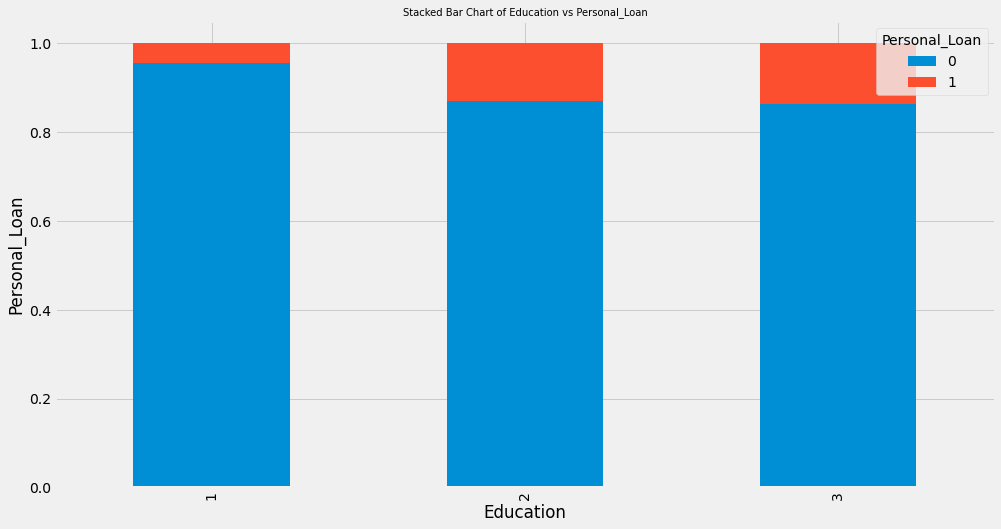

In [47]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(data.Education, data.Personal_Loan)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Personal_Loan', fontsize=10)
plt.xlabel('Education')
plt.ylabel('Personal_Loan')
plt.show()

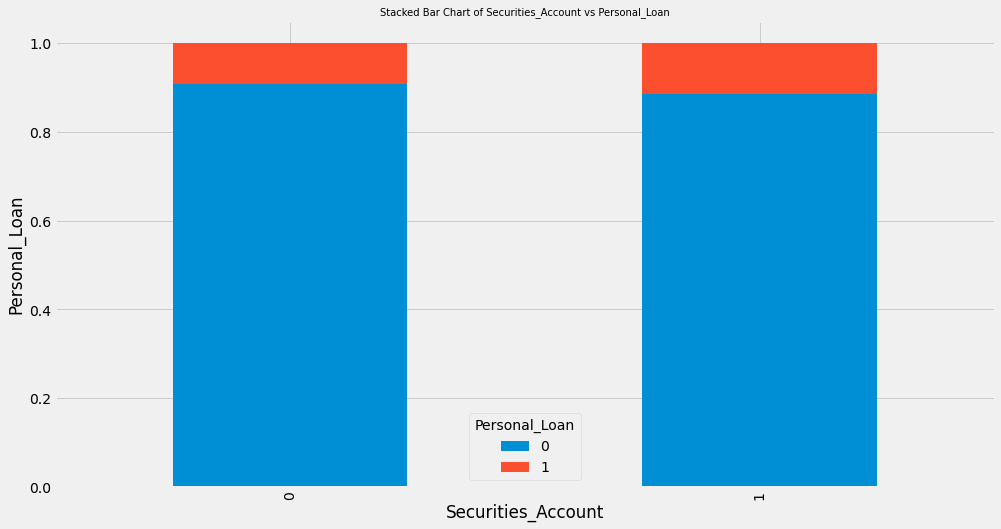

In [51]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(data.Securities_Account ,data.Personal_Loan)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Securities_Account vs Personal_Loan', fontsize=10)
plt.xlabel('Securities_Account')
plt.ylabel('Personal_Loan')
plt.show()

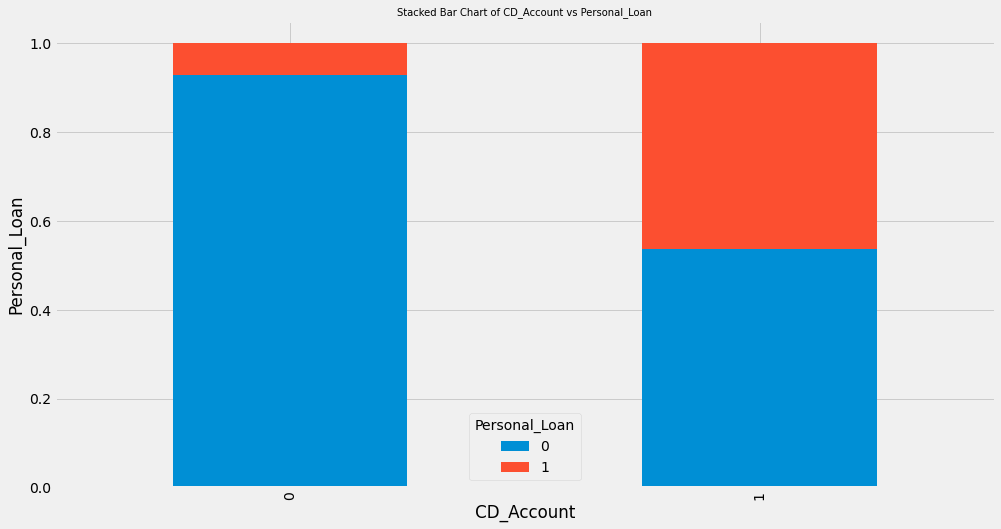

In [52]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(data.CD_Account, data.Personal_Loan)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of CD_Account vs Personal_Loan', fontsize=10)
plt.xlabel('CD_Account')
plt.ylabel('Personal_Loan')
plt.show()

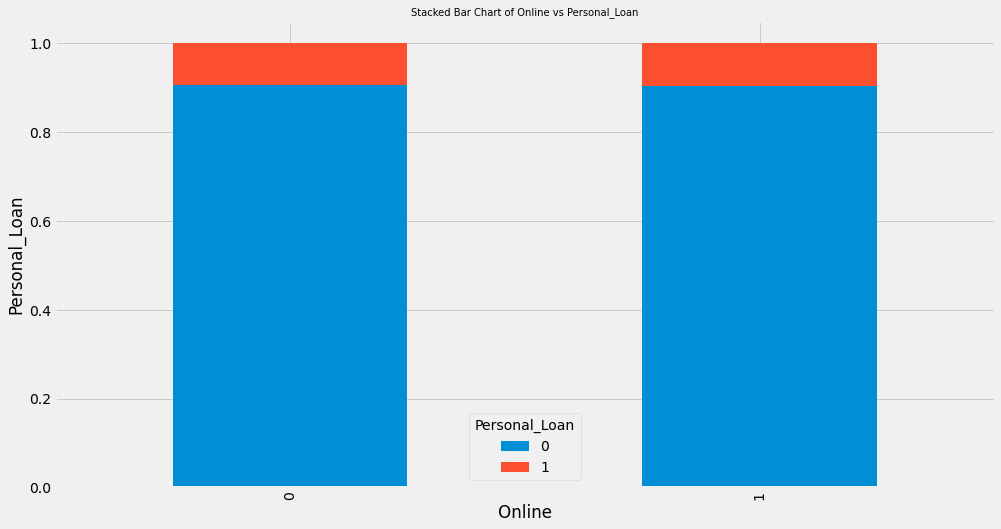

In [53]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(data.Online, data.Personal_Loan)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Online vs Personal_Loan', fontsize=10)
plt.xlabel('Online')
plt.ylabel('Personal_Loan')
plt.show()

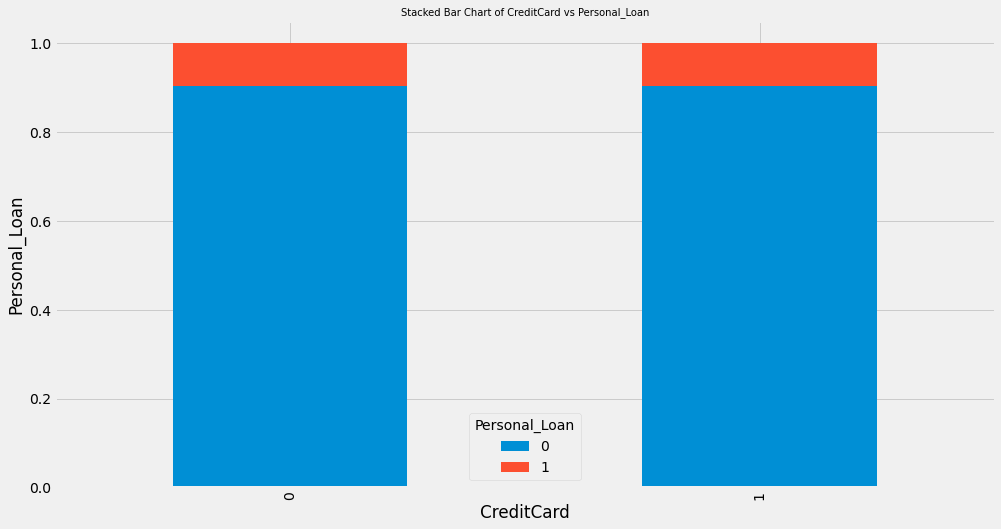

In [54]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(data.CreditCard, data.Personal_Loan)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of CreditCard vs Personal_Loan', fontsize=10)
plt.xlabel('CreditCard')
plt.ylabel('Personal_Loan')
plt.show()

## Outlier Detection Using Isolation Forest

In [59]:
clf = IsolationForest(random_state=50,contamination=.01)
clf.fit(data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


IsolationForest(contamination=0.01, random_state=50)

In [60]:
y_pred_outliers = clf.predict(data)

In [61]:
data['anomaly']=clf.predict(data.iloc[:,0:15])

In [62]:
data

,ID,Age,Experience,Income,ZIP_Code,Family_members,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,anomaly
0,1,25,1,49,91107,4.0,1.6,1,0,0,1,0,0,0,1
1,2,45,19,34,90089,3.0,1.5,1,0,0,1,0,0,0,1
2,3,39,15,11,94720,1.0,1.0,1,0,0,0,0,0,0,1
3,4,35,9,100,94112,1.0,2.7,2,0,0,0,0,0,0,1
4,5,35,8,45,91330,4.0,1.0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1.0,1.9,3,0,0,0,0,1,0,1
4996,4997,30,4,15,92037,4.0,0.4,1,85,0,0,0,1,0,1
4997,4998,63,39,24,93023,2.0,0.3,3,0,0,0,0,0,0,1
4998,4999,65,40,49,90034,3.0,0.5,2,0,0,0,0,1,0,1


In [63]:
data[data['anomaly']==-1]

,ID,Age,Experience,Income,ZIP_Code,Family_members,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,anomaly
47,48,37,12,194,91380,4.0,0.20,3,211,1,1,1,1,1,-1
209,210,64,39,172,94707,4.0,3.10,1,282,1,0,1,1,1,-1
243,244,65,39,170,90095,3.0,7.90,3,99,1,0,1,1,0,-1
322,323,63,39,101,92007,1.0,3.90,1,0,1,1,1,1,0,-1
570,571,49,25,161,94928,3.0,6.50,2,485,1,1,1,0,0,-1
671,672,65,41,105,92612,1.0,3.00,2,282,1,1,1,1,0,-1
782,783,54,30,194,92056,3.0,6.00,3,587,1,1,1,1,1,-1
914,915,65,41,195,91711,3.0,0.40,1,0,1,1,1,0,1,-1
1050,1051,53,27,145,90095,2.0,6.10,3,294,1,0,1,1,1,-1
1137,1138,51,26,134,90230,4.0,4.50,3,0,1,1,1,1,0,-1


### Removing Outliers

In [64]:
data.drop(data.index[data['anomaly']==-1])

,ID,Age,Experience,Income,ZIP_Code,Family_members,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,anomaly
0,1,25,1,49,91107,4.0,1.6,1,0,0,1,0,0,0,1
1,2,45,19,34,90089,3.0,1.5,1,0,0,1,0,0,0,1
2,3,39,15,11,94720,1.0,1.0,1,0,0,0,0,0,0,1
3,4,35,9,100,94112,1.0,2.7,2,0,0,0,0,0,0,1
4,5,35,8,45,91330,4.0,1.0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1.0,1.9,3,0,0,0,0,1,0,1
4996,4997,30,4,15,92037,4.0,0.4,1,85,0,0,0,1,0,1
4997,4998,63,39,24,93023,2.0,0.3,3,0,0,0,0,0,0,1
4998,4999,65,40,49,90034,3.0,0.5,2,0,0,0,0,1,0,1


### Splitting DataSet

In [66]:
X = data.drop(['Personal_Loan'], axis = 1)

y = data['Personal_Loan']

In [67]:
from sklearn.model_selection import StratifiedKFold, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1210)

Balancing Variable

1    331
0    331
Name: Personal_Loan, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


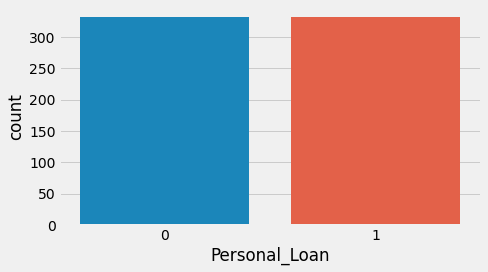

In [69]:
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# check the balanced data
print(pd.Series(y_rus).value_counts())

# plot the new distribution
fig, ax = plt.subplots(figsize=(7, 4))
ax = sns.countplot(y_rus)
plt.tight_layout()

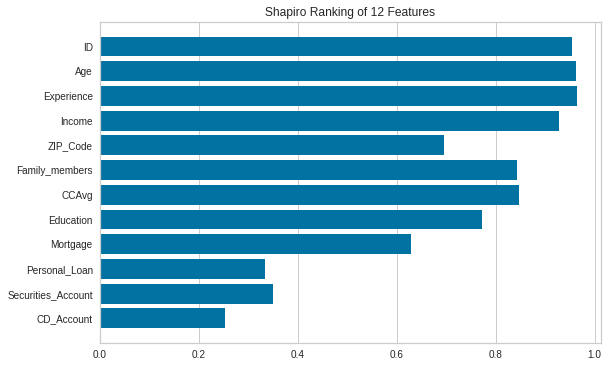

In [72]:
from yellowbrick.features import Rank1D
visualizer = Rank1D(algorithm='shapiro')
visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show() 

### Correlation Heatmap

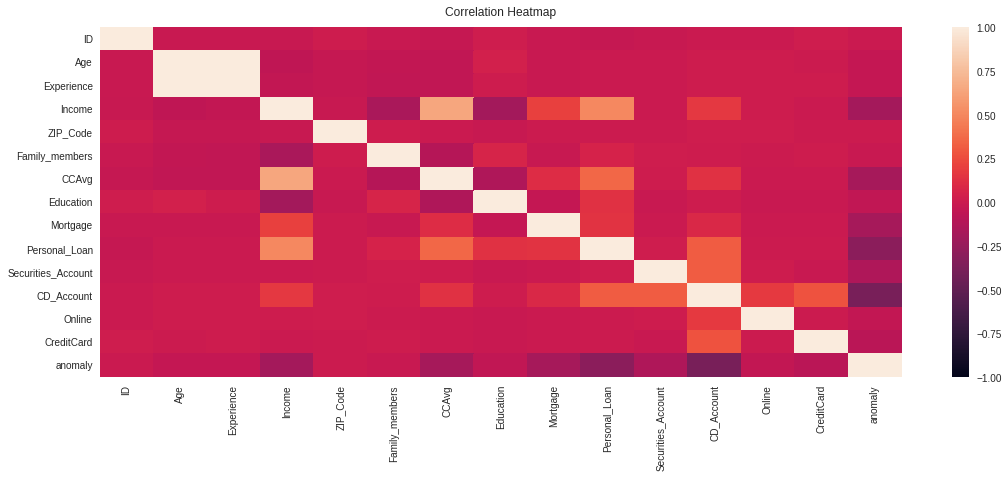

In [96]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=False)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Removing Unwanted Columns

In [ ]:
data = data.drop(['ID','ZIP_Code','Family_members','Online'],axis=1)

In [103]:
data = data.drop(['anomaly'],axis=1)

In [104]:
data

,Age,Experience,Income,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,CreditCard
0,25,1,49,1.6,1,0,0,1,0,0
1,45,19,34,1.5,1,0,0,1,0,0
2,39,15,11,1.0,1,0,0,0,0,0
3,35,9,100,2.7,2,0,0,0,0,0
4,35,8,45,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1.9,3,0,0,0,0,0
4996,30,4,15,0.4,1,85,0,0,0,0
4997,63,39,24,0.3,3,0,0,0,0,0
4998,65,40,49,0.5,2,0,0,0,0,0


### Decision Tree

In [105]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 
from sklearn import metrics

In [106]:
x = data.drop(['Personal_Loan'], axis = 1)

In [107]:
y = data['Personal_Loan']

In [116]:
X_train, X_val, y_train, y_val = train_test_split(x,y,test_size=0.2,random_state=101)

In [117]:
sk = StratifiedKFold(n_splits = 10, shuffle=True, random_state = 101)

In [120]:
from imblearn.combine import SMOTETomek

In [121]:
smk = SMOTETomek(random_state=101)
X1_res,y1_res = smk.fit_resample(x,y)
x.shape,y.shape,X1_res.shape,y1_res.shape

((5000, 9), (5000,), (8950, 9), (8950,))

In [122]:
X1_train, X1_val, y1_train, y1_val = train_test_split(X1_res,y1_res,test_size=0.2,random_state=100)

In [123]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [124]:
from sklearn.tree import DecisionTreeClassifier

In [125]:
dtmodel1 = DecisionTreeClassifier(random_state=101)
a=[3,4,5,6,7,8,9,10]
parameter = [{'max_depth':a,'max_leaf_nodes':a,'criterion':['entropy','gini'],'min_samples_split':a,'min_samples_leaf':a}]
gridparam = GridSearchCV(dtmodel1,parameter)
gridparam.fit(X1_res,y1_res)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=101),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                          'max_leaf_nodes': [3, 4, 5, 6, 7, 8, 9, 10],
                          'min_samples_leaf': [3, 4, 5, 6, 7, 8, 9, 10],
                          'min_samples_split': [3, 4, 5, 6, 7, 8, 9, 10]}])

In [126]:
gridparam.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_leaf_nodes': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 3}

In [130]:
model = DecisionTreeClassifier(random_state=101,max_depth=6,criterion='gini',max_leaf_nodes=9,min_samples_split=3,min_samples_leaf=3)
model.fit(X1_res,y1_res)
result= cross_val_score(model,X1_res,y1_res,cv=sk)
result.mean()

0.9092737430167599

In [131]:
model_1= DecisionTreeClassifier(random_state=101,max_depth=6,criterion='gini',max_leaf_nodes=9,min_samples_split=3,min_samples_leaf=3)
model_1.fit(X1_train,y1_train)
result1 = model_1.score(X1_train,y1_train)
result2 = model_1.score(X1_val,y1_val)
result1,result2

(0.9180167597765363, 0.9100558659217877)

In [133]:
print(classification_report(y1_val,model_1.predict(X1_val)))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       869
           1       0.89      0.94      0.91       921

    accuracy                           0.91      1790
   macro avg       0.91      0.91      0.91      1790
weighted avg       0.91      0.91      0.91      1790



In [136]:
roc_auc_score(y1_val, model_1.predict_proba(X1_val)[:, 1])

0.9701086650948524

In [137]:
pd.crosstab(y1_val,model_1.predict(X1_val))

col_0,0,1
Personal_Loan,,
0,765,104
1,57,864


### Random Forest

In [140]:
a = range(2,10)
parameter = [{'criterion':['gini','entropy'],'max_depth':a,'max_leaf_nodes':a,'min_samples_split':a,'max_features':['auto','sqrt','log2']}]
Rmodel = RandomForestClassifier()

In [141]:
gridRF = GridSearchCV(Rmodel,parameter)
gridRF.fit(X1_res,y1_res)
gridRF.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'max_leaf_nodes': 9,
 'min_samples_split': 2}

In [142]:
model2 = RandomForestClassifier(n_estimators=500,criterion='entropy', max_depth=8, max_leaf_nodes=9,random_state=101,min_samples_split=5)
model2.fit(X1_res,y1_res)
result3 = cross_val_score(model2,X1_res,y1_res,cv=sk)
result3.mean()

0.9150837988826817

In [145]:
model2_1 = RandomForestClassifier(n_estimators=500,criterion='entropy', max_depth=8, max_leaf_nodes=9,random_state=101,min_samples_split=5)
model2_1.fit(X1_train,y1_train)
result4 = model2_1.score(X1_train,y1_train)
result5 = model2_1.score(X1_val,y1_val)
result4,result5

(0.9203910614525139, 0.9150837988826815)

In [146]:
print(classification_report(y1_val,model2_1.predict(X1_val)))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91       869
           1       0.86      0.99      0.92       921

    accuracy                           0.92      1790
   macro avg       0.93      0.91      0.91      1790
weighted avg       0.92      0.92      0.91      1790



In [147]:
roc_auc_score(y1_val, model2_1.predict_proba(X1_val)[:, 1])

0.978944810326495

In [148]:
pd.crosstab(y1_val,model2_1.predict(X1_val))

col_0,0,1
Personal_Loan,,
0,726,143
1,9,912
